<a href="https://colab.research.google.com/github/Rodiat/FDSfE_RAyinde/blob/main/InClass10_11_22_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/walkingsped_Bettencourt07.csv",
                   header=None, names=["population", "wspeed"])

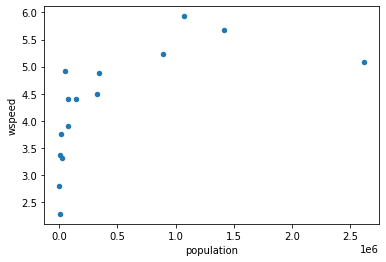

In [4]:
df.plot("population", "wspeed", kind="scatter")

In [5]:
import numpy as np

In [6]:
df["log_population"] = np.log10(df["population"])

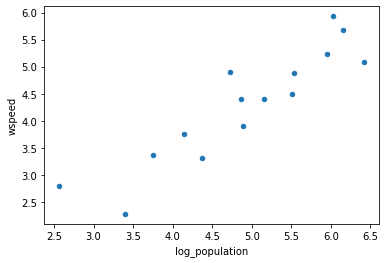

In [7]:
df.plot("log_population", "wspeed", kind="scatter")

Scikit- learn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# initiate the model
slr = LinearRegression()

In [10]:
# fit the model
slr.fit(df["log_population"], df["wspeed"])

ValueError: ignored

In [21]:
df["log_population"].shape

(15,)

In [22]:
df["log_population"].values

array([3.40140054, 2.56820172, 3.75204845, 4.14921911, 4.36735592,
       4.72098574, 4.86510397, 4.88705438, 5.161368  , 5.50514998,
       5.53275438, 5.95230801, 6.41830129, 6.15228834, 6.02938378])

In [23]:
df["log_population"].values.reshape(-1, 1)

array([[3.40140054],
       [2.56820172],
       [3.75204845],
       [4.14921911],
       [4.36735592],
       [4.72098574],
       [4.86510397],
       [4.88705438],
       [5.161368  ],
       [5.50514998],
       [5.53275438],
       [5.95230801],
       [6.41830129],
       [6.15228834],
       [6.02938378]])

In [25]:
df["log_population"].values.reshape(-1, 1).shape

(15, 1)

In [26]:
log_pop = df["log_population"].values.reshape(-1, 1)

In [27]:
log_pop.shape

(15, 1)

In [28]:
slr.fit(log_pop, df["wspeed"])

LinearRegression()

In [29]:
slr.intercept_


0.05664889151453334

In [30]:
slr.coef_

array([0.8653381])

In [32]:
slr.coef_[0]

0.8653380983187905

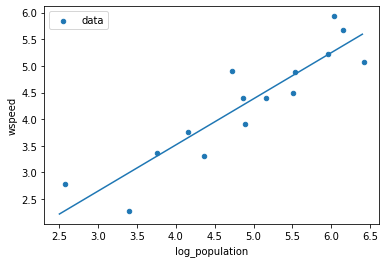

In [34]:
ax = df.plot("log_population", "wspeed", kind="scatter", label = "data")
x = np.arange(2.5, 6.5, 0.1)
y = slr.intercept_ + slr.coef_[0] * x 
ax.plot(x, y);
ax.legend();

In [35]:
slr.predict(log_pop)

array([3.00001037, 2.27901169, 3.30343936, 3.64712627, 3.83588836,
       4.14189772, 4.26660871, 4.28560323, 4.52297726, 4.8204649 ,
       4.84435204, 5.20740779, 5.61064953, 5.38045839, 5.27410438])

In [36]:
df["prediction"] = slr.predict(log_pop)

In [37]:
df

,population,wspeed,log_population,prediction
0,2520.0,2.28,3.401401,3.000010
1,370.0,2.79,2.568202,2.279012
2,5650.0,3.37,3.752048,3.303439
3,14100.0,3.76,4.149219,3.647126
4,23300.0,3.31,4.367356,3.835888
5,52600.0,4.91,4.720986,4.141898
6,73300.0,4.40,4.865104,4.266609
7,77100.0,3.90,4.887054,4.285603
8,145000.0,4.40,5.161368,4.522977
9,320000.0,4.49,5.505150,4.820465


In [38]:
def r2(yo, yp):
  return ((yo - yp)**2).sum() / ((yo - yo.mean())**2).sum()

In [39]:
r2(df["wspeed"], df["prediction"])

0.17831855421442672

In [40]:
import statsmodels.formula.api as smf

In [41]:
model = smf.ols(formula='wspeed~ population', data = df)
result = model.fit()
print(result.summary());

                            OLS Regression Results                            
Dep. Variable:                 wspeed   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     8.392
Date:                Wed, 12 Oct 2022   Prob (F-statistic):             0.0125
Time:                        00:14:40   Log-Likelihood:                -17.779
No. Observations:                  15   AIC:                             39.56
Df Residuals:                      13   BIC:                             40.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8784      0.262     14.781      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [45]:
model2 = smf.ols(formula = 'wspeed~ I(log_population**2) + log_population', data = df)
result2 = model2.fit()
result2.summary()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 wspeed   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     28.41
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           2.81e-05
Time:                        00:17:47   Log-Likelihood:                -8.4158
No. Observations:                  15   AIC:                             22.83
Df Residuals:                      12   BIC:                             24.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
